In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("population.csv")
data

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124
...,...,...,...,...,...,...,...,...
70075,2013,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Female,>=95,21
70076,2013,10,Sant Martí,70,el Besòs i el Maresme,Female,>=95,25
70077,2013,10,Sant Martí,71,Provençals del Poblenou,Female,>=95,31
70078,2013,10,Sant Martí,72,Sant Martí de Provençals,Female,>=95,38


In [4]:
data['Gender'].value_counts()

Male      35040
Female    35040
Name: Gender, dtype: int64

In [5]:
data['Age'].value_counts()

60-64    3650
75-79    3650
80-84    3650
85-89    3650
25-29    3650
55-59    3650
30-34    3650
65-69    3650
0-4      3650
90-94    3650
70-74    3650
45-49    3650
5-9      3650
20-24    3650
10-14    3650
35-39    3650
50-54    3650
40-44    3650
15-19    3650
>=95      730
Name: Age, dtype: int64

In [6]:
data['Year'].value_counts()

2013    14016
2014    14016
2015    14016
2016    14016
2017    14016
Name: Year, dtype: int64

In [7]:
data['District.Code'].value_counts()

8     12480
7     10560
10     9600
3      7680
9      6720
2      5760
5      5760
6      4800
1      3840
4      2880
Name: District.Code, dtype: int64

In [8]:
data['District.Name'].value_counts()

Nou Barris             12480
Horta-Guinardó         10560
Sant Martí              9600
Sants-Montjuïc          7680
Sant Andreu             6720
Sarrià-Sant Gervasi     5760
Eixample                5760
Gràcia                  4800
Ciutat Vella            3840
Les Corts               2880
Name: District.Name, dtype: int64

In [9]:
data['Neighborhood.Name'].value_counts()

la Barceloneta             960
Can Peguera                960
Navas                      960
les Roquetes               960
la Clota                   960
                          ... 
Sants - Badal              960
la Vila de Gràcia          960
la Teixonera               960
Provençals del Poblenou    960
la Vall d'Hebron           960
Name: Neighborhood.Name, Length: 73, dtype: int64

# There are 73 unique names in Neighborhood.Name and each name is repeated 960 times.

In [10]:
data['District.Name'].unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [11]:
data.dtypes

Year                  int64
District.Code         int64
District.Name        object
Neighborhood.Code     int64
Neighborhood.Name    object
Gender               object
Age                  object
Number                int64
dtype: object

In [12]:
data.describe()

,Year,District.Code,Neighborhood.Code,Number
count,70080.000000,70080.000000,70080.000000,70080.000000
mean,2015.000000,6.246575,37.000000,114.844720
std,1.414224,2.788356,21.071458,96.540389
min,2013.000000,1.000000,1.000000,0.000000
25%,2014.000000,4.000000,19.000000,43.000000
50%,2015.000000,7.000000,37.000000,92.000000
75%,2016.000000,8.000000,55.000000,162.000000
max,2017.000000,10.000000,73.000000,777.000000


In [13]:
data.pivot_table(data,index = ["District.Name","Gender"])

District.Code  Neighborhood.Code      Number  Year
District.Name       Gender                                                    
Ciutat Vella        Female              1                2.5  125.204688  2015
                    Male                1                2.5  138.126563  2015
Eixample            Female              2                7.5  246.401736  2015
                    Male                2                7.5  212.842708  2015
Gràcia              Female              6               30.0  136.410833  2015
                    Male                6               30.0  115.209167  2015
Horta-Guinardó      Female              7               38.0   84.047538  2015
                    Male                7               38.0   74.526515  2015
Les Corts           Female              4               20.0  151.290972  2015
                    Male                4               20.0  132.073611  2015
Nou Barris          Female              8               50.0   69.974679  2015
                    Male                8               50.0   62.456731  2015
Sant Andreu         Female              9               60.0  114.724405  2015
                    Male                9               60.0  103.623214  2015
Sant Martí          Female             10               68.5  126.228750  2015
                    Male               10               68.5  117.220208  2015
Sants-Montjuïc      Female              3               14.5  123.173958  2015
                    Male                3               14.5  113.063802  2015
Sarrià-Sant Gervasi Female              5               24.5  138.410069  2015
                    Male                5               24.5  116.855903  2015

In [14]:
data.pivot_table(data,index=["District.Name","Year","Gender"])

District.Code  Neighborhood.Code      Number
District.Name       Year Gender                                              
Ciutat Vella        2013 Female              1                2.5  127.177083
                         Male                1                2.5  141.934896
                    2014 Female              1                2.5  124.682292
                         Male                1                2.5  137.518229
                    2015 Female              1                2.5  123.903646
...                                        ...                ...         ...
Sarrià-Sant Gervasi 2015 Male                5               24.5  116.895833
                    2016 Female              5               24.5  139.215278
                         Male                5               24.5  117.774306
                    2017 Female              5               24.5  140.411458
                         Male                5               24.5  118.753472

[100 rows x 3 columns]

In [15]:
pd.pivot_table(data,index=["District.Name","Neighborhood.Name"],values=["Number"])

Number
District.Name       Neighborhood.Name                                
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera  117.303125
                    el Barri Gòtic                          82.459375
                    el Raval                               248.091667
                    la Barceloneta                          78.808333
Eixample            Sant Antoni                            198.872917
...                                                               ...
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova             131.477083
                    Sarrià                                 128.588542
                    Vallvidrera, el Tibidabo i les Planes   23.807292
                    el Putxet i el Farró                   152.552083
                    les Tres Torres                         85.190625

[73 rows x 1 columns]

In [16]:
data1 = data.drop(['District.Name','Neighborhood.Name'],axis = 1)
data1

,Year,District.Code,Neighborhood.Code,Gender,Age,Number
0,2017,1,1,Male,0-4,224
1,2017,1,2,Male,0-4,50
2,2017,1,3,Male,0-4,43
3,2017,1,4,Male,0-4,95
4,2017,2,5,Male,0-4,124
...,...,...,...,...,...,...
70075,2013,10,69,Female,>=95,21
70076,2013,10,70,Female,>=95,25
70077,2013,10,71,Female,>=95,31
70078,2013,10,72,Female,>=95,38


In [17]:
data1['Age'].unique()

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '>=95'], dtype=object)

In [18]:
data1['Age'].replace(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '>=95'],[4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,95],inplace = True)

In [19]:
data1['Gender'].replace(['Female','Male'],[1,0],inplace = True)

In [20]:
data1

,Year,District.Code,Neighborhood.Code,Gender,Age,Number
0,2017,1,1,0,4,224
1,2017,1,2,0,4,50
2,2017,1,3,0,4,43
3,2017,1,4,0,4,95
4,2017,2,5,0,4,124
...,...,...,...,...,...,...
70075,2013,10,69,1,95,21
70076,2013,10,70,1,95,25
70077,2013,10,71,1,95,31
70078,2013,10,72,1,95,38


In [21]:
data1.dtypes

Year                 int64
District.Code        int64
Neighborhood.Code    int64
Gender               int64
Age                  int64
Number               int64
dtype: object

In [22]:
Age = data1['Age'].astype(int)
Gender = data1['Gender'].astype(int)

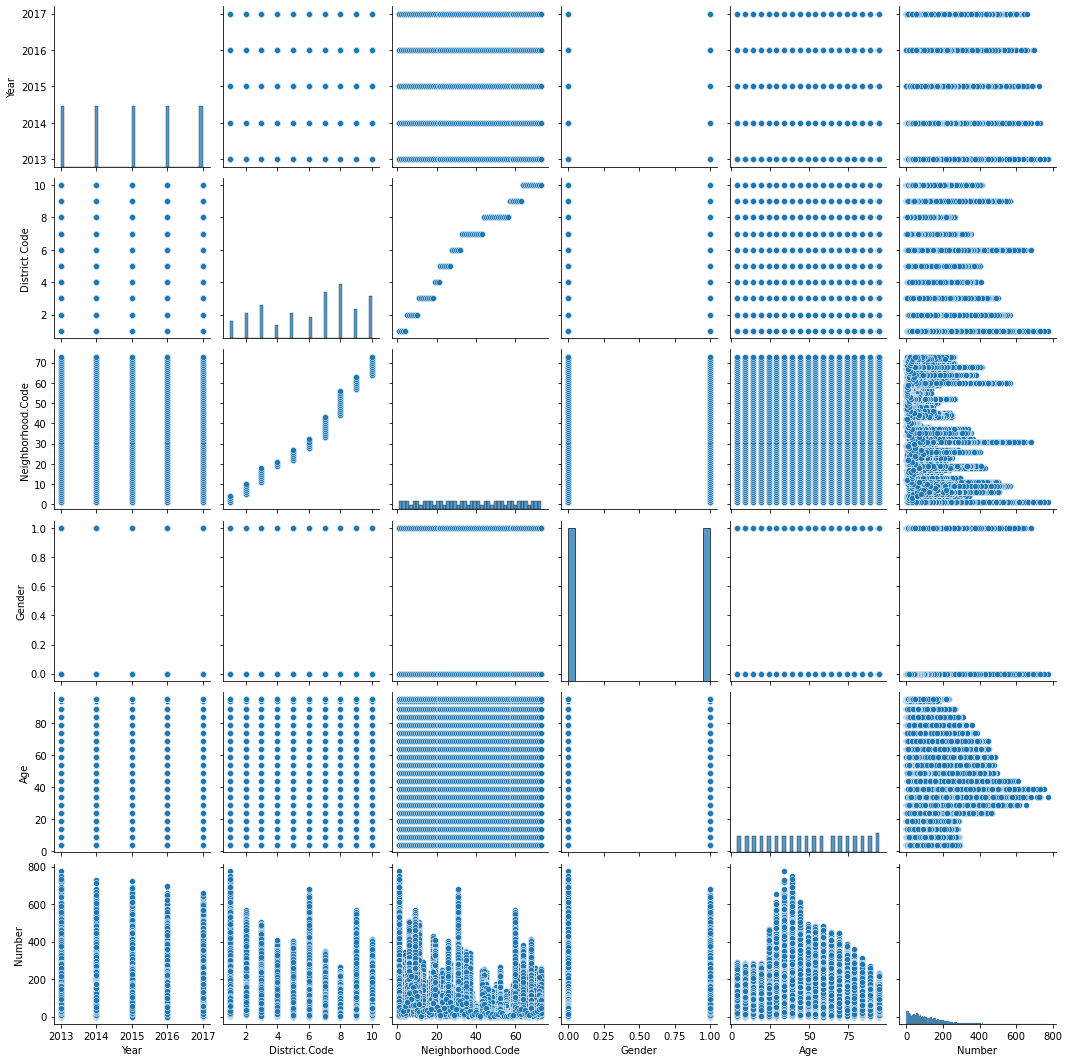

In [23]:
import seaborn as sns
sns.pairplot(data1)

In [24]:
import seaborn as sns

C:\Users\Sree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

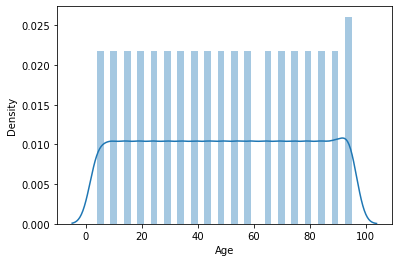

In [25]:
sns.distplot(data1['Age'])

C:\Users\Sree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='District.Code', ylabel='Density'>

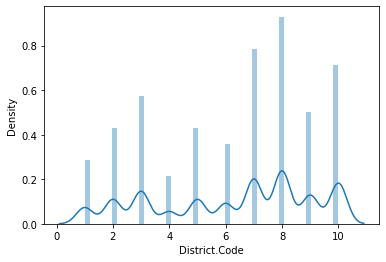

In [26]:
sns.distplot(data1['District.Code'])

C:\Users\Sree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Neighborhood.Code', ylabel='Density'>

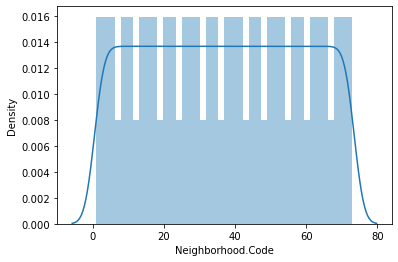

In [27]:
sns.distplot(data1['Neighborhood.Code'])

C:\Users\Sree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

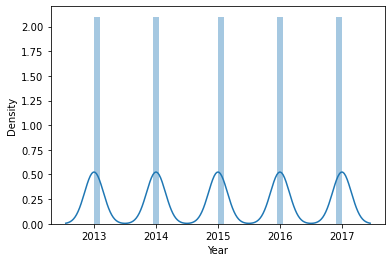

In [28]:
sns.distplot(data1['Year'])

C:\Users\Sree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gender', ylabel='Density'>

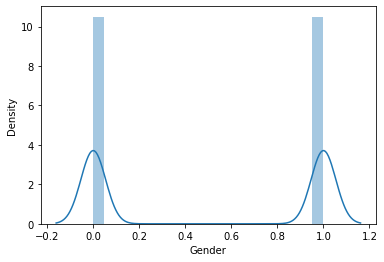

In [29]:
sns.distplot(data1['Gender'])

<AxesSubplot:>

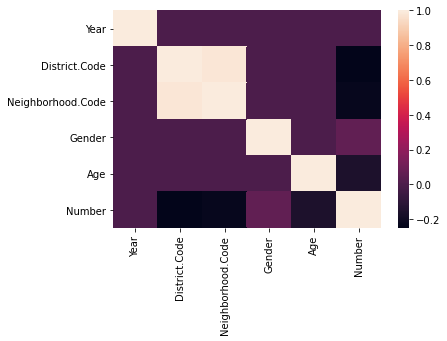

In [30]:
corr = data1.corr()
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns)

In [31]:
import statsmodels.api as sm

In [32]:
Number = data1['Number']
Year = data1['Year']
neighborhood_code = data1['Neighborhood.Code']
district_code = data1['District.Code']

In [33]:
model = sm.OLS(Number,Age).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Number   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                          4.375e+04
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                        0.00
Time:                        23:40:36   Log-Likelihood:                     -4.3360e+05
No. Observations:               70080   AIC:                                  8.672e+05
Df Residuals:                   70079   BIC:                                  8.672e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            1.6412      0.008    209.175      0.000       1.626       1.657
==============================================================================
Omnibus:                     7363.946   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11248.790
Skew:                           0.784   Prob(JB):                         0.00
Kurtosis:                       4.181   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model = sm.OLS(Number,district_code).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Number   R-squared (uncentered):                   0.401
Model:                            OLS   Adj. R-squared (uncentered):              0.401
Method:                 Least Squares   F-statistic:                          4.698e+04
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                        0.00
Time:                        23:40:36   Log-Likelihood:                     -4.3262e+05
No. Observations:               70080   AIC:                                  8.652e+05
Df Residuals:                   70079   BIC:                                  8.653e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
District.Code    13.8941      0.064    216.744      0.000      13.768      14.020
==============================================================================
Omnibus:                    15060.746   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31003.147
Skew:                           1.277   Prob(JB):                         0.00
Kurtosis:                       5.024   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model = sm.OLS(Number,neighborhood_code).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Number   R-squared (uncentered):                   0.351
Model:                            OLS   Adj. R-squared (uncentered):              0.351
Method:                 Least Squares   F-statistic:                          3.784e+04
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                        0.00
Time:                        23:40:36   Log-Likelihood:                     -4.3547e+05
No. Observations:               70080   AIC:                                  8.709e+05
Df Residuals:                   70079   BIC:                                  8.710e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Neighborhood.Code     2.0864      0.011    194.525      0.000       2.065       2.107
==============================================================================
Omnibus:                    13836.663   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26902.425
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       4.842   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
features1 = data1.iloc[:,0:]
features1

,Year,District.Code,Neighborhood.Code,Gender,Age,Number
0,2017,1,1,0,4,224
1,2017,1,2,0,4,50
2,2017,1,3,0,4,43
3,2017,1,4,0,4,95
4,2017,2,5,0,4,124
...,...,...,...,...,...,...
70075,2013,10,69,1,95,21
70076,2013,10,70,1,95,25
70077,2013,10,71,1,95,31
70078,2013,10,72,1,95,38


In [37]:
df = pd.DataFrame(features1)
df

,Year,District.Code,Neighborhood.Code,Gender,Age,Number
0,2017,1,1,0,4,224
1,2017,1,2,0,4,50
2,2017,1,3,0,4,43
3,2017,1,4,0,4,95
4,2017,2,5,0,4,124
...,...,...,...,...,...,...
70075,2013,10,69,1,95,21
70076,2013,10,70,1,95,25
70077,2013,10,71,1,95,31
70078,2013,10,72,1,95,38


In [38]:
features = data1.iloc[:,:-1]
features

,Year,District.Code,Neighborhood.Code,Gender,Age
0,2017,1,1,0,4
1,2017,1,2,0,4
2,2017,1,3,0,4
3,2017,1,4,0,4
4,2017,2,5,0,4
...,...,...,...,...,...
70075,2013,10,69,1,95
70076,2013,10,70,1,95
70077,2013,10,71,1,95
70078,2013,10,72,1,95


In [39]:
df1 = pd.DataFrame(features)
df1

,Year,District.Code,Neighborhood.Code,Gender,Age
0,2017,1,1,0,4
1,2017,1,2,0,4
2,2017,1,3,0,4
3,2017,1,4,0,4
4,2017,2,5,0,4
...,...,...,...,...,...
70075,2013,10,69,1,95
70076,2013,10,70,1,95
70077,2013,10,71,1,95
70078,2013,10,72,1,95


In [40]:
labels = data1.iloc[:,-1:]
labels

,Number
0,224
1,50
2,43
3,95
4,124
...,...
70075,21
70076,25
70077,31
70078,38


In [41]:
df2 = pd.DataFrame(labels)
df2

,Number
0,224
1,50
2,43
3,95
4,124
...,...
70075,21
70076,25
70077,31
70078,38


# Linear Regression

In [42]:
X  = df1['District.Code']
y = df2['Number']

In [43]:
#Split the data into training set and test set(80% and 20%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [44]:
X_train

35665    7
21416    6
38367    7
3019     5
11337    5
        ..
49100    8
20609    5
21440    8
50057    8
5192     2
Name: District.Code, Length: 49056, dtype: int64

In [45]:
X_test

64844    4
52504    3
42764    9
61590    8
65795    5
        ..
67766    5
18884    8
26083    5
47110    5
60498    8
Name: District.Code, Length: 21024, dtype: int64

In [46]:
y_train

35665      5
21416     64
38367    205
3019     226
11337    133
        ... 
49100    122
20609     23
21440    117
50057     32
5192     152
Name: Number, Length: 49056, dtype: int64

In [47]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

In [48]:
X_train = X_train.values.reshape(-1,1)

In [49]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(X_train,y_train)

In [50]:
accuracy = model.score(X_train,y_train)
print('Accuracy of the model',accuracy)

Accuracy of the model 0.06149523225907527


In [51]:
print('intercept:',model.intercept_)
print('Slope:',model.coef_)

intercept: 168.28209756829804
Slope: [-8.57180634]


In [52]:
X_test = X_test.values.reshape(-1,1)

In [53]:
#Predictions from the model 
predictions = model.predict(X_test)
print('predicted Charges:',predictions,sep='\n')

predicted Charges:
[133.99487223 142.56667856  91.13584055 ... 125.42306589 125.42306589
  99.70764689]


In [54]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

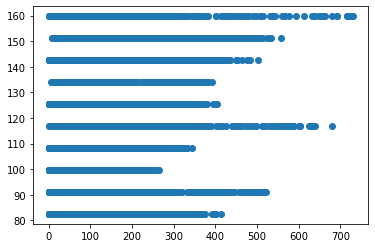

In [55]:
plt.scatter(y_test,predictions)

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
X_train = X_train.reshape(-1,1)
y_train_prediction = model.predict(X_train)
X_test = X_test.reshape(-1,1)
y_test_prediction = model.predict(X_test)

In [57]:
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training = r2_score(y_train,y_train_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('RMSE is {}'.format(rmse_training))
print('R2_score is {}'.format(r2_training))

The model performance for training set
-------------------------------------
RMSE is 93.49433993149859
R2_score is 0.06149523225907527


In [58]:
rmse_testing = (np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing = r2_score(y_test,y_test_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('root mean squared error is:',rmse_testing)
print('r2 score is:',r2_testing)

The model performance for training set
-------------------------------------
root mean squared error is: 93.45265643921978
r2 score is: 0.06432084748041145


Text(0, 0.5, 'Numbers')

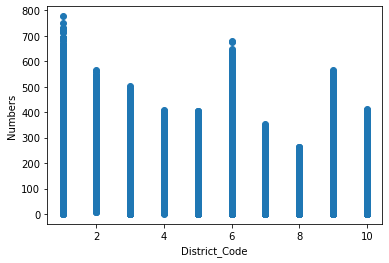

In [59]:
# plotting values
#data points
plt.scatter(X,y)
plt.xlabel('District_Code')
plt.ylabel('Numbers')

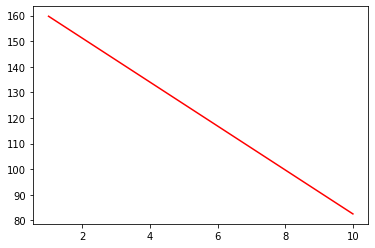

In [60]:
X = X.values.reshape(-1,1)
y_predicted = model.predict(X)
#predicted values
plt.plot(X,y_predicted,color = 'r')
plt.show()

In [61]:
X  = df1['Neighborhood.Code']
y = df2['Number']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [63]:
X_train

35665    42
21416    28
38367    43
3019     27
11337    23
         ..
49100    45
20609    24
21440    52
50057    53
5192     10
Name: Neighborhood.Code, Length: 49056, dtype: int64

In [64]:
X_test

64844    21
52504    18
42764    60
61590    52
65795    23
         ..
67766    23
18884    51
26083    23
47110    26
60498    55
Name: Neighborhood.Code, Length: 21024, dtype: int64

In [65]:
y_train

35665      5
21416     64
38367    205
3019     226
11337    133
        ... 
49100    122
20609     23
21440    117
50057     32
5192     152
Name: Number, Length: 49056, dtype: int64

In [66]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

In [67]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [68]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(X_train,y_train)

In [69]:
accuracy = model.score(X_train,y_train)
print('Accuracy of the model',accuracy)

Accuracy of the model 0.051772948909544314


In [70]:
accuracy = model.score(X_test,y_test)
print('Accuracy of the model',accuracy)

Accuracy of the model 0.054489373878275016


In [71]:
print('intercept:',model.intercept_)
print('Slope:',model.coef_)

intercept: 153.25077831951103
Slope: [-1.0404772]


In [72]:
#Predictions from the model 
predictions = model.predict(X_test)
print('predicted Charges:',predictions,sep='\n')

predicted Charges:
[131.40075719 134.52218878  90.82214651 ... 129.31980279 126.1983712
  96.02453249]


In [73]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

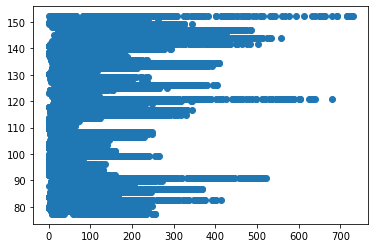

In [74]:
plt.scatter(y_test,predictions)

In [75]:
from sklearn.metrics import mean_squared_error,r2_score
X_train = X_train.reshape(-1,1)
y_train_prediction = model.predict(X_train)
X_test = X_test.reshape(-1,1)
y_test_prediction = model.predict(X_test)

In [76]:
rmse_training = (np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training = r2_score(y_train,y_train_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('RMSE is {}'.format(rmse_training))
print('R2_score is {}'.format(r2_training))

The model performance for training set
-------------------------------------
RMSE is 93.97736170613751
R2_score is 0.051772948909544314


In [77]:
rmse_testing = (np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing = r2_score(y_test,y_test_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('root mean squared error is:',rmse_testing)
print('r2 score is:',r2_testing)

The model performance for training set
-------------------------------------
root mean squared error is: 93.94234163154502
r2 score is: 0.054489373878275016


Text(0, 0.5, 'Numbers')

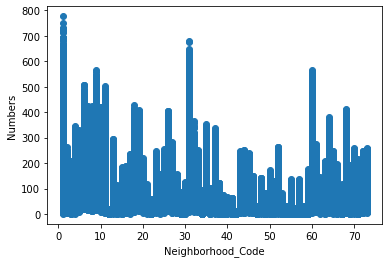

In [78]:
# plotting values
#data points
plt.scatter(X,y)
plt.xlabel('Neighborhood_Code')
plt.ylabel('Numbers')

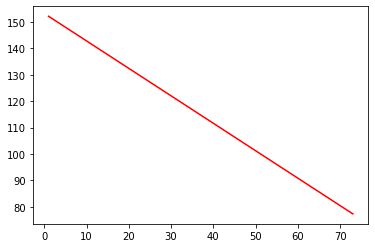

In [79]:
X = X.values.reshape(-1,1)
y_predicted = model.predict(X)
#predicted values
plt.plot(X,y_predicted,color = 'r')
plt.show()

In [80]:
X = df1['Age']
y = df2['Number']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [82]:
X_train

35665     9
21416     9
38367    49
3019     44
11337    59
         ..
49100     4
20609    94
21440     9
50057    14
5192     74
Name: Age, Length: 49056, dtype: int64

In [83]:
X_test

64844    24
52504    49
42764     9
61590    79
65795    39
         ..
67766    64
18884    69
26083    69
47110    69
60498    64
Name: Age, Length: 21024, dtype: int64

In [84]:
y_train

35665      5
21416     64
38367    205
3019     226
11337    133
        ... 
49100    122
20609     23
21440    117
50057     32
5192     152
Name: Number, Length: 49056, dtype: int64

In [85]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

In [86]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [87]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(X_train,y_train)

In [88]:
accuracy = model.score(X_train,y_train)
print('Accuracy of the model',accuracy)

Accuracy of the model 0.02338095404009488


In [89]:
accuracy = model.score(X_test,y_test)
print('Accuracy of the model',accuracy)

Accuracy of the model 0.02437250848027117


In [90]:
print('intercept:',model.intercept_)
print('Slope:',model.coef_)

intercept: 141.1264004272663
Slope: [-0.53313877]


In [91]:
predictions = model.predict(X_test)
print('predicted Charges:',predictions,sep='\n')

predicted Charges:
[128.33106985 115.0026005  136.32815146 ... 104.33982501 104.33982501
 107.00551888]


In [92]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

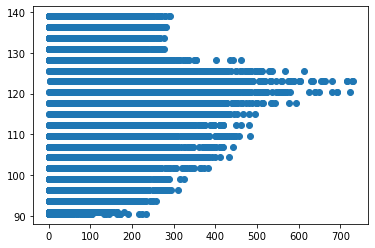

In [93]:
plt.scatter(y_test,predictions)

In [94]:
from sklearn.metrics import mean_squared_error,r2_score
X_train = X_train.reshape(-1,1)
y_train_prediction = model.predict(X_train)
X_test = X_test.reshape(-1,1)
y_test_prediction = model.predict(X_test)

In [95]:
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training = r2_score(y_train,y_train_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('RMSE is {}'.format(rmse_training))
print('R2_score is {}'.format(r2_training))

The model performance for training set
-------------------------------------
RMSE is 95.37392876821139
R2_score is 0.02338095404009488


In [96]:
rmse_testing = (np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing = r2_score(y_test,y_test_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('root mean squared error is:',rmse_testing)
print('r2 score is:',r2_testing)

The model performance for training set
-------------------------------------
root mean squared error is: 95.42676229917417
r2 score is: 0.02437250848027117


Text(0, 0.5, 'Number')

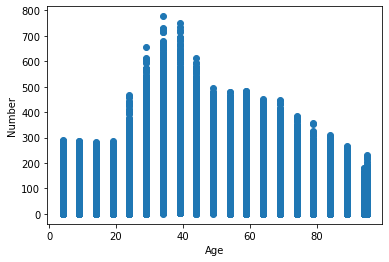

In [97]:
plt.scatter(X,y)
plt.xlabel('Age')
plt.ylabel('Number')

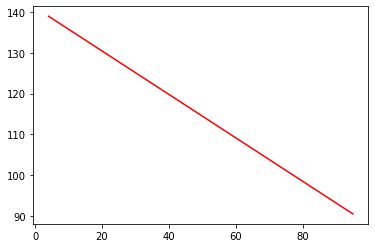

In [98]:
X = X.values.reshape(-1,1)
y_predicted = model.predict(X)
#predicted values
plt.plot(X,y_predicted,color = 'r')
plt.show()

In [99]:
X = df1['Gender']
y = df2['Number']

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [101]:
X_train

35665    1
21416    1
38367    1
3019     0
11337    1
        ..
49100    1
20609    0
21440    1
50057    1
5192     0
Name: Gender, Length: 49056, dtype: int64

In [102]:
X_test

64844    1
52504    1
42764    0
61590    0
65795    1
        ..
67766    1
18884    0
26083    1
47110    0
60498    0
Name: Gender, Length: 21024, dtype: int64

In [103]:
y_train

35665      5
21416     64
38367    205
3019     226
11337    133
        ... 
49100    122
20609     23
21440    117
50057     32
5192     152
Name: Number, Length: 49056, dtype: int64

In [104]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

In [105]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [106]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(X_train,y_train)

In [107]:
accuracy = model.score(X_train,y_train)
print('Accuracy of the model',accuracy)

Accuracy of the model 0.003926708352009589


In [108]:
accuracy = model.score(X_test,y_test)
print('Accuracy of the model',accuracy)

Accuracy of the model 0.004231046579189823


In [109]:
print('intercept:',model.intercept_)
print('Slope:',model.coef_)

intercept: 108.73192025013176
Slope: [12.09525237]


In [110]:
predictions = model.predict(X_test)
print('predicted Charges:',predictions,sep='\n')

predicted Charges:
[120.82717262 120.82717262 108.73192025 ... 120.82717262 108.73192025
 108.73192025]


In [111]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

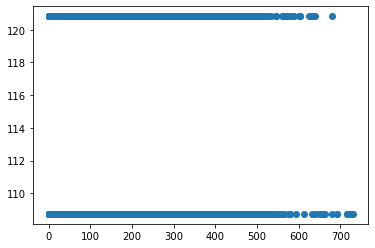

In [112]:
plt.scatter(y_test,predictions)

In [113]:
from sklearn.metrics import mean_squared_error,r2_score
X_train = X_train.reshape(-1,1)
y_train_prediction = model.predict(X_train)
X_test = X_test.reshape(-1,1)
y_test_prediction = model.predict(X_test)

In [114]:
rmse_training = (np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training = r2_score(y_train,y_train_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('RMSE is {}'.format(rmse_training))
print('R2_score is {}'.format(r2_training))

The model performance for training set
-------------------------------------
RMSE is 96.31916873808473
R2_score is 0.003926708352009589


In [115]:
rmse_testing = (np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing = r2_score(y_test,y_test_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('root mean squared error is:',rmse_testing)
print('r2 score is:',r2_testing)

The model performance for training set
-------------------------------------
root mean squared error is: 96.40675501587896
r2 score is: 0.004231046579189823


Text(0, 0.5, 'Number')

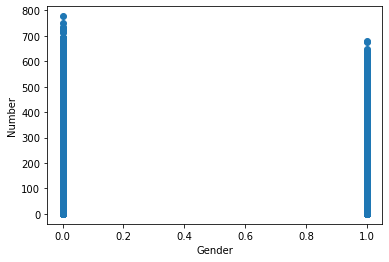

In [116]:
plt.scatter(X,y)
plt.xlabel('Gender')
plt.ylabel('Number')

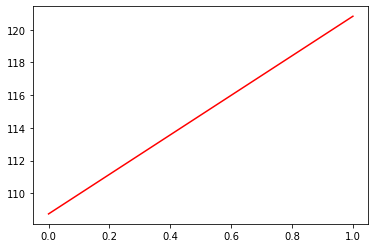

In [117]:
X = X.values.reshape(-1,1)
y_predicted = model.predict(X)
#predicted values
plt.plot(X,y_predicted,color = 'r')
plt.show()

In [118]:
X = df1['Year']
y = df2['Number']

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [120]:
X_train

35665    2015
21416    2016
38367    2015
3019     2017
11337    2017
         ... 
49100    2014
20609    2016
21440    2016
50057    2014
5192     2017
Name: Year, Length: 49056, dtype: int64

In [121]:
X_test

64844    2013
52504    2014
42764    2014
61590    2013
65795    2013
         ... 
67766    2013
18884    2016
26083    2016
47110    2014
60498    2013
Name: Year, Length: 21024, dtype: int64

In [122]:
y_train

35665      5
21416     64
38367    205
3019     226
11337    133
        ... 
49100    122
20609     23
21440    117
50057     32
5192     152
Name: Number, Length: 49056, dtype: int64

In [123]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

In [124]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [125]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(X_train,y_train)

In [126]:
accuracy = model.score(X_train,y_train)
print('Accuracy of the model',accuracy)

Accuracy of the model 3.986762072483163e-05


In [127]:
accuracy = model.score(X_test,y_test)
print('Accuracy of the model',accuracy)

Accuracy of the model -0.00012803557505369767


In [128]:
print('intercept:',model.intercept_)
print('Slope:',model.coef_)

intercept: -754.3543365880083
Slope: [0.43132183]


In [129]:
predictions = model.predict(X_test)
print('predicted Charges:',predictions,sep='\n')

predicted Charges:
[113.89650268 114.32782451 114.32782451 ... 115.19046817 114.32782451
 113.89650268]


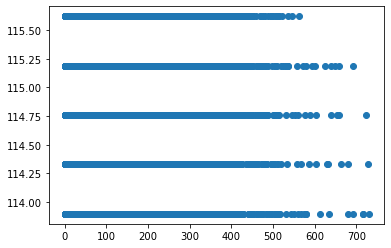

In [130]:
plt.scatter(y_test,predictions)

In [131]:
X_train = X_train.reshape(-1,1)
y_train_prediction = model.predict(X_train)
X_test = X_test.reshape(-1,1)
y_test_prediction = model.predict(X_test)

In [132]:
rmse_training = (np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training = r2_score(y_train,y_train_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('RMSE is {}'.format(rmse_training))
print('R2_score is {}'.format(r2_training))

The model performance for training set
-------------------------------------
RMSE is 96.50691233181163
R2_score is 3.986762072483163e-05


In [133]:
rmse_testing = (np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing = r2_score(y_test,y_test_prediction)
print('The model performance for training set')
print('-------------------------------------')
print('root mean squared error is:',rmse_testing)
print('r2 score is:',r2_testing)

The model performance for training set
-------------------------------------
root mean squared error is: 96.61753988284337
r2 score is: -0.00012803557505369767


Text(0, 0.5, 'charges')

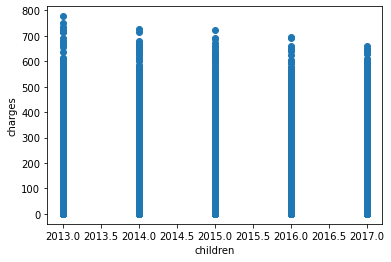

In [134]:
plt.scatter(X,y)
plt.xlabel('children')
plt.ylabel('charges')

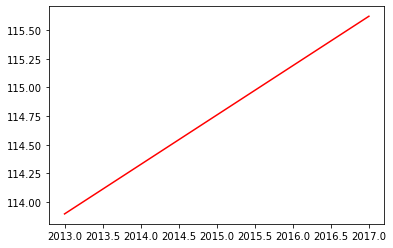

In [135]:
X = X.values.reshape(-1,1)
y_predicted = model.predict(X)
#predicted values
plt.plot(X,y_predicted,color = 'r')
plt.show()

# Multiple Linear Regression

In [136]:
X = df1[['District.Code','Neighborhood.Code']]
y = df2['Number']

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 1)

In [138]:
X_train

,District.Code,Neighborhood.Code
35665,7,42
21416,6,28
38367,7,43
3019,5,27
11337,5,23
...,...,...
49100,8,45
20609,5,24
21440,8,52
50057,8,53


In [139]:
X_test

,District.Code,Neighborhood.Code
64844,4,21
52504,3,18
42764,9,60
61590,8,52
65795,5,23
...,...,...
67766,5,23
18884,8,51
26083,5,23
47110,5,26


In [140]:
y_train

35665      5
21416     64
38367    205
3019     226
11337    133
        ... 
49100    122
20609     23
21440    117
50057     32
5192     152
Name: Number, Length: 49056, dtype: int64

In [141]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

In [142]:
#define the data/predictors as the pre-set feature names
features = X_train.iloc[:,:].values

In [143]:
labels = y_train.iloc[:].values
labels

array([  5,  64, 205, ..., 117,  32, 152], dtype=int64)

In [144]:
X = features
y = labels

In [145]:
# Instantiate Multiple linear regression model
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(X,y)

Accuracy of the model: 0.06801437328521864


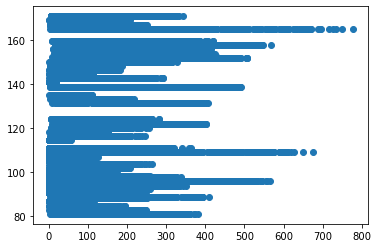

In [146]:
predictions = model.predict(X)
#check model accuracy
accuracy = model.score(X,y)
print('Accuracy of the model:',accuracy)
# Visualize the predictions
plt.scatter(y,predictions)

In [147]:
#evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
# printing values
print('Slope:',model.coef_)
print('Intercept:',model.intercept_)
print("\n")

Slope: [-22.64370235   1.89784201]
Intercept: 185.93809167672492




In [148]:
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)
print("The model performance")
print("----------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance
----------------------
RMSE is 93.16905392949353
R2 score is 0.06801437328521864




In [149]:
X = df1[['District.Code','Neighborhood.Code','Age']]
y = df2['Number']

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 1)

In [151]:
X_train

,District.Code,Neighborhood.Code,Age
35665,7,42,9
21416,6,28,9
38367,7,43,49
3019,5,27,44
11337,5,23,59
...,...,...,...
49100,8,45,4
20609,5,24,94
21440,8,52,9
50057,8,53,14


In [152]:
X_test

,District.Code,Neighborhood.Code,Age
64844,4,21,24
52504,3,18,49
42764,9,60,9
61590,8,52,79
65795,5,23,39
...,...,...,...
67766,5,23,64
18884,8,51,69
26083,5,23,69
47110,5,26,69


In [153]:
y_train

35665      5
21416     64
38367    205
3019     226
11337    133
        ... 
49100    122
20609     23
21440    117
50057     32
5192     152
Name: Number, Length: 49056, dtype: int64

In [154]:
y_test

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

In [155]:
#define the data/predictors as the pre-set feature names
features = X_train.iloc[:,:].values

In [156]:
labels = y_train.iloc[:].values
labels

array([  5,  64, 205, ..., 117,  32, 152], dtype=int64)

In [157]:
X = features
y = labels

In [158]:
# Instantiate Multiple linear regression model
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(X,y)

Accuracy of the model: 0.0915200372525401


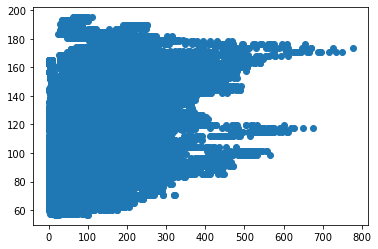

In [159]:
predictions = model.predict(X)
#check model accuracy
accuracy = model.score(X,y)
print('Accuracy of the model:',accuracy)
# Visualize the predictions
plt.scatter(y,predictions)

Accuracy of the model: 0.0915200372525401


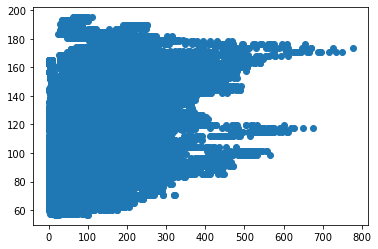

In [160]:
predictions = model.predict(X)
#check model accuracy
accuracy = model.score(X,y)
print('Accuracy of the model:',accuracy)
# Visualize the predictions
plt.scatter(y,predictions)

In [161]:
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)
print("The model performance")
print("----------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance
----------------------
RMSE is 91.98663980725985
R2 score is 0.0915200372525401




In [162]:
X = df1[['Year','District.Code','Neighborhood.Code','Age','Gender']]
y = df2['Number']

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 1)

In [164]:
X_train

,Year,District.Code,Neighborhood.Code,Age,Gender
35665,2015,7,42,9,1
21416,2016,6,28,9,1
38367,2015,7,43,49,1
3019,2017,5,27,44,0
11337,2017,5,23,59,1
...,...,...,...,...,...
49100,2014,8,45,4,1
20609,2016,5,24,94,0
21440,2016,8,52,9,1
50057,2014,8,53,14,1


In [165]:
X_test

,Year,District.Code,Neighborhood.Code,Age,Gender
64844,2013,4,21,24,1
52504,2014,3,18,49,1
42764,2014,9,60,9,0
61590,2013,8,52,79,0
65795,2013,5,23,39,1
...,...,...,...,...,...
67766,2013,5,23,64,1
18884,2016,8,51,69,0
26083,2016,5,23,69,1
47110,2014,5,26,69,0


In [166]:
y_train

35665      5
21416     64
38367    205
3019     226
11337    133
        ... 
49100    122
20609     23
21440    117
50057     32
5192     152
Name: Number, Length: 49056, dtype: int64

In [167]:
y_test 

64844     68
52504    281
42764    240
61590    153
65795    202
        ... 
67766    156
18884     57
26083    129
47110    209
60498     37
Name: Number, Length: 21024, dtype: int64

In [168]:
#define the data/predictors as the pre-set feature names
features = X_train.iloc[:,:].values

In [169]:
labels = y_train.iloc[:].values
labels

array([  5,  64, 205, ..., 117,  32, 152], dtype=int64)

In [170]:
X = features
y = labels

In [171]:
# Instantiate Multiple linear regression model
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(X,y)

Accuracy of the model: 0.09550930831174498


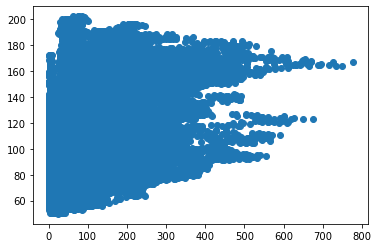

In [172]:
predictions = model.predict(X)
#check model accuracy
accuracy = model.score(X,y)
print('Accuracy of the model:',accuracy)
# Visualize the predictions
plt.scatter(y,predictions)

In [173]:
#evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
# printing values
print('Slope:',model.coef_)
print('Intercept:',model.intercept_)
print("\n")

Slope: [  0.38351553 -22.59138943   1.88881713  -0.53459227  12.13933641]
Intercept: -566.436906152678




In [174]:
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)
print("The model performance")
print("----------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance
----------------------
RMSE is 91.78445407635725
R2 score is 0.09550930831174498




In [176]:
import pickle
filename = 'picklefile.pkl'
pickle.dump( model,open(filename, 'wb'))